In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Finding the climatology of an ensemble member
# Need to take the mean over the time dimension for each grid point
# Should get a grid lat v lon for one time and psl value at each grid point
# Then to find the anomaly take the lat lon grid timeseries and - the climatology.
# Then do for lots of ensembles?
# define a function that finds the climatology and then the anomaly
# - calc climatology within function and then discard? Can always update later
# save the anomaly t-series to a .nc file elsewhere - extant create a new folder 
# psl_anomalies/hist-aer/HadGEM3... 
# Then can loop through for each ensemble member
# Define experiment, model, variable (psl), time (perhaps splice to that time once file is loaded in to pervent errors
# gonna need them all the same time though. hmm so maybe change after. Want function just to calc anom and clim.

# look into groupby for seasonal? Do I want djf?


# OKAY this is just going to be to create a load of .nc files containing the psl anomalies

In [23]:
# going to pass file to function
# as may loop through a list of files and then run function

def find_psl_anomaly_annual(ds, var, output_file):
    #checking it is a datetime object
    ds['time'] = xr.decode_cf(ds).time

    #selecting the psl variable
    ds_psl = ds[var]

    #calculating the climatology, the mean across all the months and years
    clim_ann = ds_psl.mean(dim='time')

    #Take the psl values and subtract the climatology from them to get the anomaly
    anomaly = ds_psl - clim_ann
    #print(anomaly['year'].values)

    anomaly = anomaly.resample(time='1YE').mean()
    
    #save to a net cdf file
    anomaly.to_netcdf(output_file)


variable = 'psl'
experiment = 'historical'
model = 'HadGEM3-GC31-LL'
filename = '/gws/nopw/j04/leader_epesc/CMIP6_SinglForcHistSimul/InterpolatedFlds/psl/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r11i1p1f3_interp.nc'
ds = xr.open_dataset(filename)
filename = filename.replace('interp.nc', 'annual_anomaly.nc')
filename = filename.replace('leader_epesc/CMIP6_SinglForcHistSimul/InterpolatedFlds/psl/','extant/users/slbennie/psl_anomalies/')

print(filename)
find_psl_anomaly_annual(ds,variable,filename)
#anomaly.plot()


/gws/nopw/j04/extant/users/slbennie/psl_anomalies/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r11i1p1f3_annual_anomaly.nc


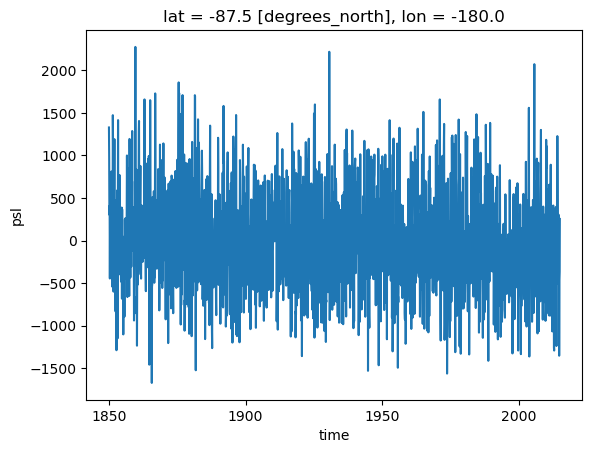

In [19]:
ds_anomaly = xr.open_dataset(filename)
ds_anomaly_pt = ds_anomaly[variable].isel(lat=0,lon=0)
ds_anomaly_pt.plot()

In [5]:
print(len(ds_anomaly['time']))

513


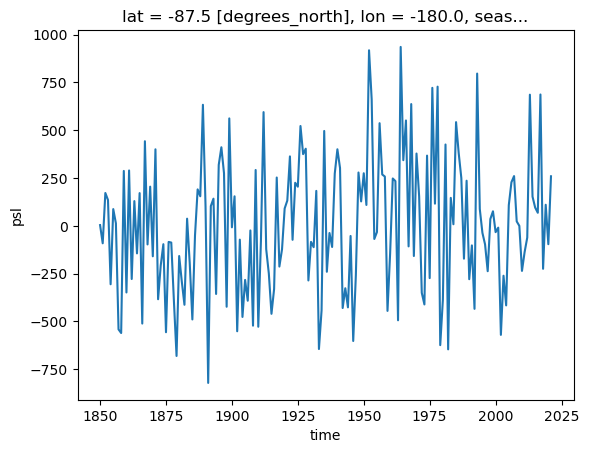

In [6]:
ds_anomaly = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/psl_anomalies/hist-aer/HadGEM3-GC31-LL/psl_mon_hist-aer_HadGEM3-GC31-LL_r11i1p1f3_DJF_anomaly2.nc')
ds_anomaly_pt = ds_anomaly[variable].isel(lat=0,lon=0)
ds_anomaly_pt.plot()

In [7]:
print(len(ds_anomaly['year']))

172


In [23]:
def find_psl_anomaly_ens_mean_clim(ds, var, seas, clim_season, output_file):
    # checking it is a datetime object
    ds['time'] = xr.decode_cf(ds).time

    # selecting the psl variable
    variable = ds[var]

    # so this creates the avg djf over the entire time period.
    # print(clim_season['psl'].shape)

    # selecting just the djf values (will subract climatology from this)
    ds_months_for_seas = ds.sel(time=variable['time.season'] ==seas)

    # then need to avg over djf for each year.
    # select by year so that we can group by it
    ds_months_for_seas = ds_months_for_seas.assign_coords(year=ds_months_for_seas['time'].dt.year)


    # account for the fact that djf would be over two years, so selecting the december ones and increasing the year by 1.
    ds_months_for_seas['year'] = ds_months_for_seas['year'].where(ds_months_for_seas['time'].dt.month != 12, ds_months_for_seas['year'] + 1)

    ds_months_for_seas = ds_months_for_seas.set_coords('year')

    # now group by the year to then calculate the mean between the months. (not the years like previously done)
    ds_season = ds_months_for_seas.groupby('year').mean(dim='time')

    # then subtract the climatology (clim_season)

    anomaly = ds_season - clim_season
    print(anomaly['year'].values)

    anomaly.to_netcdf(output_file)
    print('done', output_file)

In [46]:
variable = 'psl'
season = 'DJF'
experiment = 'historical'
model = 'HadGEM3-GC31-LL'
var = 'psl'
seas = 'DJF'
filename = '/gws/nopw/j04/extant/users/slbennie/CVDP_outputs/ens_mean_spat/psl/ens_mean_spat_psl_mon_historical_HadGEM3-GC31-LL.nc'
ds = xr.open_dataset(filename)

# checking it is a datetime object
ds['time'] = xr.decode_cf(ds).time

# selecting the psl variable
variable = ds[var]

# creating a season coordinate
season = ds.groupby('time.season')

# compute mean over djf - finding the djf climatology
clim_season = season.mean(dim='time').sel(season=seas)


filename = '/gws/nopw/j04/leader_epesc/CMIP6_SinglForcHistSimul/InterpolatedFlds/psl/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r11i1p1f3_interp.nc'
ds = xr.open_dataset(filename)
filename = filename.replace('interp.nc', seas+'_anomaly_ens_mean_clim.nc')
filename = filename.replace('leader_epesc/CMIP6_SinglForcHistSimul/InterpolatedFlds/psl/','extant/users/slbennie/psl_anomalies/')
find_psl_anomaly_ens_mean_clim(ds, var, seas, clim_season, filename)

[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
done /gws/nopw/j04/extant/users/slbennie/psl_anomalies/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r11i1p1f3_DJF_anomaly_ens_mean_clim.nc


In [49]:
ds_anomaly = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/psl_anomalies/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r11i1p1f3_DJF_anomaly_ens_mean_clim.nc')
#ds_anomaly_pt = ds_anomaly[variable].isel(lat=0,lon=0)
ds_anomaly_pt.plot()

ValueError: Unsupported key-type <class 'xarray.core.dataarray.DataArray'>

<xarray.Dataset> Size: 84kB
Dimensions:  (lat: 71, lon: 144)
Coordinates:
  * lat      (lat) float64 568B -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
  * lon      (lon) float64 1kB -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    season   <U3 12B 'DJF'
Data variables:
    psl      (lat, lon) float64 82kB 1.001e+05 1.001e+05 ... 1.023e+05 1.023e+05


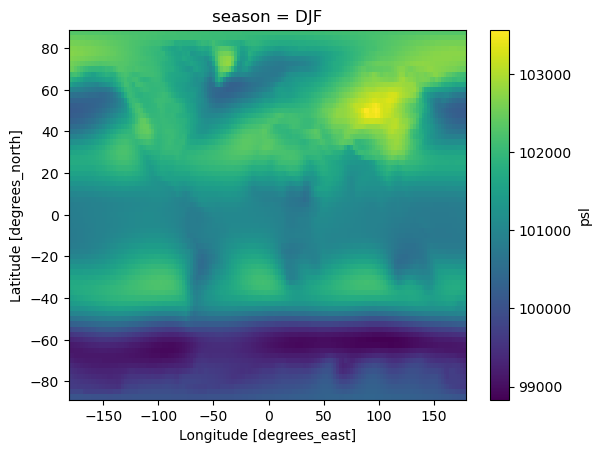

In [48]:
print(clim_season)

clim_season['psl'].plot()